EXERCISE 1:


TASK 1:
Plot the populations for the years in the period. Add legend and axis labels to the plot.

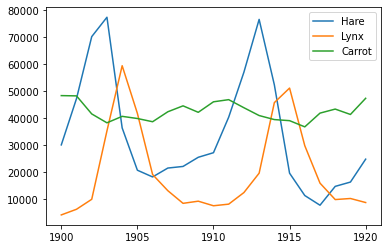

In [16]:
import numpy as np
import matplotlib.pyplot as plt

data = np.loadtxt('http://scipy-lectures.org/_downloads/populations.txt')

years = data[:,0]
plt.plot(years, data[:,1], label = 'Hare')
plt.plot(years, data[:,2], label = 'Lynx')
plt.plot(years, data[:,3], label = 'Carrot')
plt.xticks(years.astype(int)[::5])
plt.legend()
plt.show()

TASK 2:
Assuming total population of hares and lynxes is 100%, plot stacked bar graph showing ratio of each specis for the years in the period.

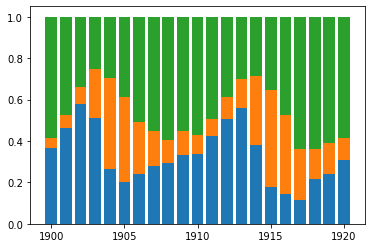

In [34]:
import numpy as np
import matplotlib.pyplot as plt

data = np.loadtxt('http://scipy-lectures.org/_downloads/populations.txt')

years = data[:,0]
summa = data[:,1] + data[:,2] + data[:,3]
plt.bar(years, data[:,1] / summa, label = 'Hare')
plt.bar(years, data[:,2] / summa, bottom = data[:,1] / summa, label = 'Lynx')
plt.bar(years, data[:,3] / summa, bottom = data[:,2] / summa + data[:,1] / summa, label = 'Carrot')
plt.show()


TASK 3: Find the mean and std of the populations of each species. Plot the historgam of population for each species and show mean values with vertical line. Arrange 3 subplots in a row.

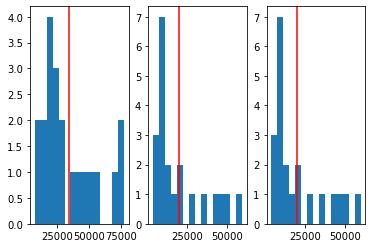

In [63]:
import numpy as np
import matplotlib.pyplot as plt

data = np.loadtxt('http://scipy-lectures.org/_downloads/populations.txt')

fig, ax = plt.subplots(1, 3)

ax[0].hist(data[:,1], bins = 15)
ax[0].axvline(data[:,1].mean(), c = 'r')

ax[1].hist(data[:,2], bins = 15)
ax[1].axvline(data[:,2].mean(), c = 'r')

ax[2].hist(data[:,2], bins = 15)
ax[2].axvline(data[:,2].mean(), c = 'r')
plt.show()

TASK 4: Find which year each species had the largest population. Mark these years in the plot of populations.

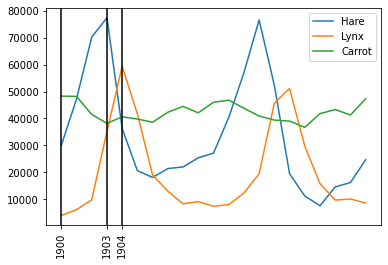

In [62]:
import numpy as np
import matplotlib.pyplot as plt

data = np.loadtxt('http://scipy-lectures.org/_downloads/populations.txt')

plt.plot(years, data[:,1], label = 'Hare')
plt.plot(years, data[:,2], label = 'Lynx')
plt.plot(years, data[:,3], label = 'Carrot')
plt.axvline(years[np.argmax(data[:,1])], c = 'black')
plt.axvline(years[np.argmax(data[:,2])], c = 'black')
plt.axvline(years[np.argmax(data[:,3])], c = 'black')
plt.xticks([years[np.argmax(data[:,1])], years[np.argmax(data[:,2])], years[np.argmax(data[:,3])]], rotation = 90)
plt.legend()
plt.show()

TASK 5: Find which species (hares or lynxes) has the largest population for each year. Print the result as [H, H, L, H, ...]. Plot a pie chart showing ratio of "H" and "L" values obtained.

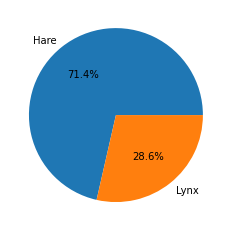

['H', 'H', 'H', 'H', 'L', 'L', 'L', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'L', 'L', 'L', 'H', 'H', 'H']


In [22]:
import numpy as np
import matplotlib.pyplot as plt

data = np.loadtxt('http://scipy-lectures.org/_downloads/populations.txt')

years = data[:,0]
plt.pie([sum(data[:,1] >= data[:,2]), sum(data[:,2] > data[:,1])], labels = ['Hare','Lynx'], autopct='%1.1f%%')
plt.show()
a= list()
for i in range(0,len(years)):
    if data[:,1][i] >= data[:,2][i]:
        a.append('H')
    else:
        a.append('L')
print(a)

TASK 6: Find which years any of the populations is above 50000. Show time periods where populations are above 50000
in the plot of populations.

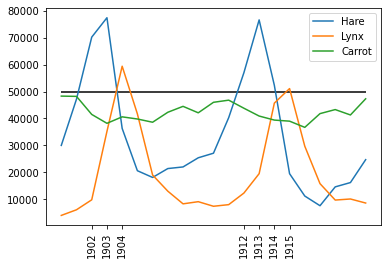

In [33]:
import numpy as np
import matplotlib.pyplot as plt

data = np.loadtxt('http://scipy-lectures.org/_downloads/populations.txt')

fig, ax = plt.subplots()

years = data[:,0]
plt.plot(years, data[:,1], label = 'Hare')
plt.plot(years, data[:,2], label = 'Lynx')
plt.plot(years, data[:,3], label = 'Carrot')

a = np.maximum(data[:,1], data[:,2], data[:,3])
plt.xticks(years[a > 50000], rotation = 90)
ax.hlines(50000, 1900, 1920)
plt.legend()
plt.show()

TASK 7: Find the top 2 years for each species when they had the lowest populations.

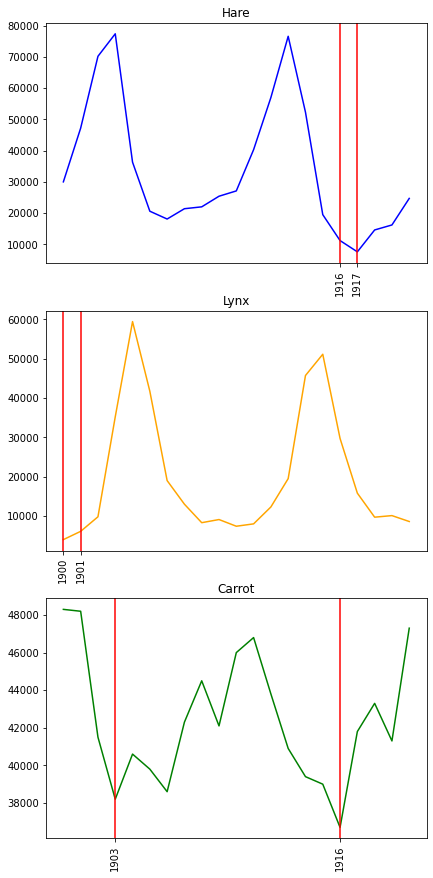

In [65]:
import numpy as np
import matplotlib.pyplot as plt

data = np.loadtxt("http://scipy-lectures.org/_downloads/populations.txt")

years = data[:,0]

ha1 = np.argmin(data[:,1])
hmax = np.max(data[:,1])
ha2 = np.argmin(np.insert(np.delete(data[:,1], ha1), ha1, hmax))
ly1 = np.argmin(data[:,2])
lmax = np.max(data[:,2])
ly2 = np.argmin(np.insert(np.delete(data[:,2], ly1), ly1, lmax))
ca1 = np.argmin(data[:,3])
cmax = np.max(data[:,3])
ca2 = np.argmin(np.insert(np.delete(data[:,3], ca1), ca1, cmax))


plt.figure(figsize=(15,15))

plt.subplot(3, 2, 1)
plt.plot(years, data[:,1], c = 'b')
plt.title('Hare')
plt.axvline(years[ha1], c = 'r')
plt.axvline(years[ha2], c = 'r')
plt.xticks([years[ha1], years[ha2]], rotation = 90)

plt.subplot(3, 2, 3)
plt.plot(years, data[:,2], c = 'orange')
plt.title('Lynx')
plt.axvline(years[ly1], c = 'r')
plt.axvline(years[ly2], c = 'r')
plt.xticks([years[ly1], years[ly2]], rotation = 90)

plt.subplot(3, 2, 5)
plt.plot(years, data[:,3], c = 'g')
plt.title('Carrot')
plt.axvline(years[ca1], c = 'r')
plt.axvline(years[ca2], c = 'r')
plt.xticks([years[ca1], years[ca2]], rotation = 90)

plt.show()

TASK 8: Plot the change in hare population and the number of lynxes. Find the correlation coefficient.

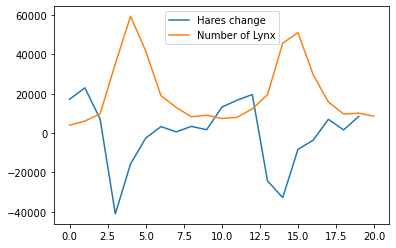

Correlation coefficient is: 
[[ 1.         -0.69334852]
 [-0.69334852  1.        ]]


In [69]:
import numpy as np
import matplotlib.pyplot as plt

data = np.loadtxt("http://scipy-lectures.org/_downloads/populations.txt")

cor_coef = np.corrcoef(np.diff(data[:,1]), data[:-1,2])

plt.plot(np.diff(data[:,1]), label = 'Hares change')
plt.plot(data[:,2], label = 'Number of Lynx')
plt.legend()
plt.show()
print('Correlation coefficient is: ')
print(cor_coef)

TASK 9: Show population of hares vs carrots and hares vs lynxes.

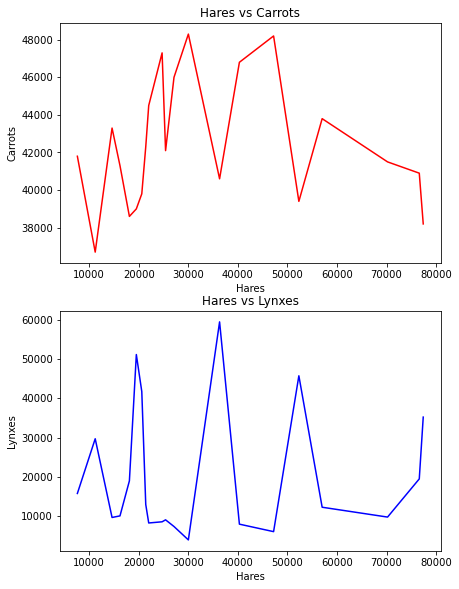

In [79]:
import numpy as np
import matplotlib.pyplot as plt

data = np.loadtxt("http://scipy-lectures.org/_downloads/populations.txt")

plt.figure(figsize=(15,15))

plt.subplot(3, 2, 1)
plt.plot(data[np.argsort(data[:, 1]), 1], data[np.argsort(data[:, 1]), 3], c= 'r')
plt.title('Hares vs Carrots')
plt.xlabel('Hares')
plt.ylabel('Carrots')

plt.subplot(3, 2, 3)
plt.plot(data[np.argsort(data[:, 1]), 1], data[np.argsort(data[:, 1]), 2], c='b')
plt.title('Hares vs Lynxes')
plt.xlabel('Hares')
plt.ylabel('Lynxes')

plt.show()


TASK 10: Assume the population of hares in 1920 is unknown. Suggest a way to estimate this value. Compare an estimated value
with the true value and print a ratio of the error to the true value.

In [86]:
data = np.loadtxt('http://scipy-lectures.org/_downloads/populations.txt')

years = data[:,0] 
hare = data[:,1]
print('Population of hares in 1920: ', data[:,1][20])
print('Estimated population: ',np.median(data[:,1]))
print('Error: ', ((np.median(data[:,1]) - data[:,1][20]) / data[:,1][20]))

Population of hares in 1920:  24700.0
Estimated population:  25400.0
Error:  0.02834008097165992


EXERCISE 2: Plot a graph of total explained variance vs number of principal components.

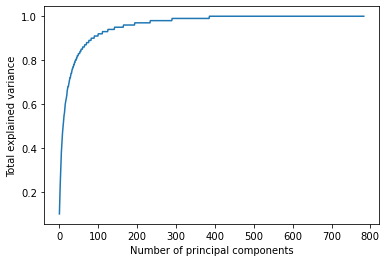

In [88]:
from sklearn.decomposition import PCA
from sklearn.datasets import fetch_openml

digits = fetch_openml('mnist_784')
pca = PCA()

X_transformed = pca.fit_transform(digits.data.astype(float))
exp_var = pca.explained_variance_ratio_.cumsum().round(2)
plt.plot(exp_var)
plt.ylabel('Total explained variance')
plt.xlabel('Number of principal components')
plt.show()

EXERCISE 3: Find a number of principal components for 99%, 95%, 90%, and 85% of explained variance.

In [91]:
j = np.where(exp_var == 0.99)
v_99 = int(round(np.mean(j)))
print('Number of principal components for 99% of explained variance: ', v_99)

j = np.where(exp_var == 0.95)
v_95 = int(round(np.mean(j)))
print('Number of principal components for 95% of explained variance: ', v_95)

j = np.where(exp_var == 0.90)
v_90 = int(round(np.mean(j)))
print('Number of principal components for 90% of explained variance: ', v_90)

j = np.where(exp_var == 0.85)
v_85 = int(round(np.mean(j)))
print('Number of principal components for 85% of explained variance: ', v_85)

Number of principal components for 99% of explained variance:  338
Number of principal components for 95% of explained variance:  153
Number of principal components for 90% of explained variance:  86
Number of principal components for 85% of explained variance:  58


EXERCISE 4: Plot an original image and restored images from 99%, 95%, 90%, and 85% of explained variance.

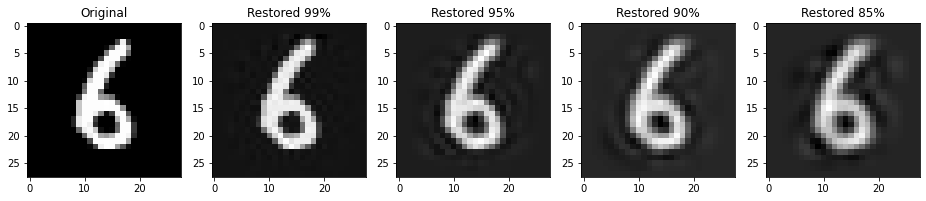

In [93]:
pca_99 = PCA(v_99)
X_transformed_99 = pca_99.fit_transform(digits.data.astype(float))
X_restored_99 = pca_99.inverse_transform(X_transformed_99)

pca_95 = PCA(v_95)
X_transformed_95 = pca_95.fit_transform(digits.data.astype(float))
X_restored_95 = pca_95.inverse_transform(X_transformed_95)

pca_90 = PCA(v_90)
X_transformed_90 = pca_90.fit_transform(digits.data.astype(float))
X_restored_90 = pca_90.inverse_transform(X_transformed_90)

pca_85 = PCA(v_85)
X_transformed_85 = pca_85.fit_transform(digits.data.astype(float))
X_restored_85 = pca_85.inverse_transform(X_transformed_85)

images = digits.data.reshape(-1, 28, 28)
i = 1020
fig, ax = plt.subplots(1, 5, figsize=(16, 7))

ax[0].imshow(images[i], cmap='gray')
ax[1].imshow(X_restored_99[i].reshape(28, 28), cmap = 'gray')
ax[2].imshow(X_restored_95[i].reshape(28, 28), cmap = 'gray')
ax[3].imshow(X_restored_90[i].reshape(28, 28), cmap = 'gray')
ax[4].imshow(X_restored_85[i].reshape(28, 28), cmap = 'gray')
ax[0].set_title('Original')
ax[1].set_title('Restored 99%')
ax[2].set_title('Restored 95%')
ax[3].set_title('Restored 90%')
ax[4].set_title('Restored 85%')
plt.show()